In [1]:
!python --version

Python 3.11.3


In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib



Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user mediapipe


Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    pass

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [50]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [76]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [65]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

mp.holistic.POSE_CONNECTIONS

In [29]:
mp_drawing.draw_landmarks??

In [82]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [54]:
len(results.face_landmarks.landmark)

468

In [55]:
len(results.pose_landmarks.landmark)

33

In [66]:
frame

array([[[138, 156, 142],
        [126, 145, 132],
        [123, 141, 131],
        ...,
        [223, 238, 233],
        [223, 240, 233],
        [223, 240, 233]],

       [[137, 155, 142],
        [125, 143, 131],
        [119, 137, 128],
        ...,
        [224, 238, 233],
        [224, 240, 233],
        [224, 240, 233]],

       [[136, 152, 141],
        [121, 138, 129],
        [116, 133, 127],
        ...,
        [228, 238, 234],
        [228, 240, 235],
        [227, 239, 233]],

       ...,

       [[183, 180, 176],
        [182, 179, 175],
        [181, 178, 174],
        ...,
        [133, 141, 160],
        [133, 141, 160],
        [133, 142, 161]],

       [[180, 177, 173],
        [180, 177, 173],
        [180, 177, 173],
        ...,
        [127, 143, 156],
        [125, 143, 154],
        [124, 143, 154]],

       [[177, 174, 170],
        [178, 175, 171],
        [180, 177, 173],
        ...,
        [124, 143, 154],
        [120, 142, 150],
        [118, 142, 148]]

In [67]:
draw_landmarks(frame, results)

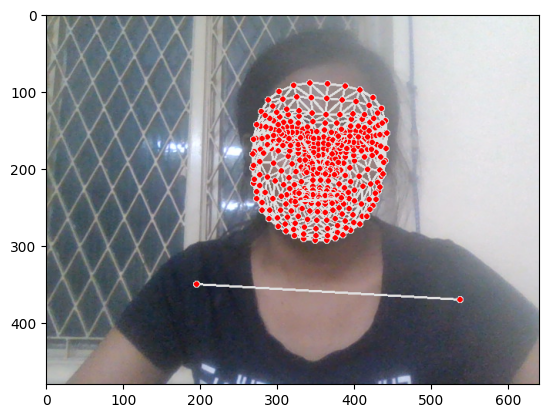

In [68]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [69]:
results

mediapipe.python.solution_base.SolutionOutputs

In [70]:
draw_landmarks(frame, results)

In [71]:
results.pose_landmarks.landmark

[x: 0.555259347
y: 0.417667449
z: -1.34470725
visibility: 0.999497592
, x: 0.592888474
y: 0.330023766
z: -1.27880216
visibility: 0.999003887
, x: 0.616643488
y: 0.330310881
z: -1.27885091
visibility: 0.998988748
, x: 0.634226143
y: 0.331618309
z: -1.27926373
visibility: 0.998757482
, x: 0.516366363
y: 0.335393935
z: -1.28398514
visibility: 0.999155223
, x: 0.493446767
y: 0.336788028
z: -1.28345227
visibility: 0.999289
, x: 0.472674042
y: 0.339867413
z: -1.28389955
visibility: 0.99929297
, x: 0.659375966
y: 0.366296113
z: -0.806491077
visibility: 0.99883312
, x: 0.442157805
y: 0.376279175
z: -0.805476785
visibility: 0.999545693
, x: 0.598828673
y: 0.497549027
z: -1.16345155
visibility: 0.999660432
, x: 0.506145835
y: 0.50829
z: -1.16278255
visibility: 0.999769211
, x: 0.839799404
y: 0.770966947
z: -0.46828866
visibility: 0.996207356
, x: 0.305976093
y: 0.730935514
z: -0.515232205
visibility: 0.998197496
, x: 0.986543477
y: 1.02841675
z: -0.415725291
visibility: 0.243594751
, x: 0.097911

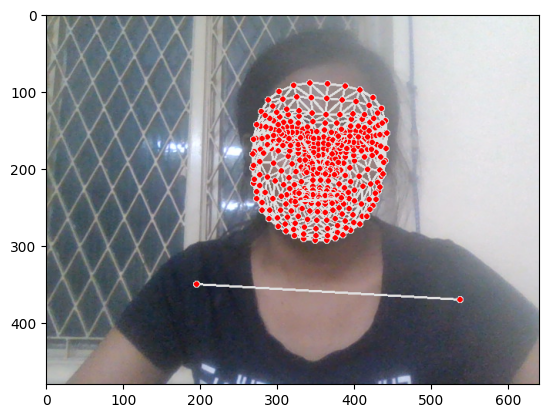

In [73]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [41]:
import mediapipe as mp

mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh  # Face Mesh model

def draw_landmarks(image, results):
    # Draw face connections (use FACEMESH_TESSELATION instead of FACE_CONNECTIONS)
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION
        )

    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    # Draw right hand connections
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [42]:
results

mediapipe.python.solution_base.SolutionOutputs

In [43]:
draw_landmarks(frame, results)

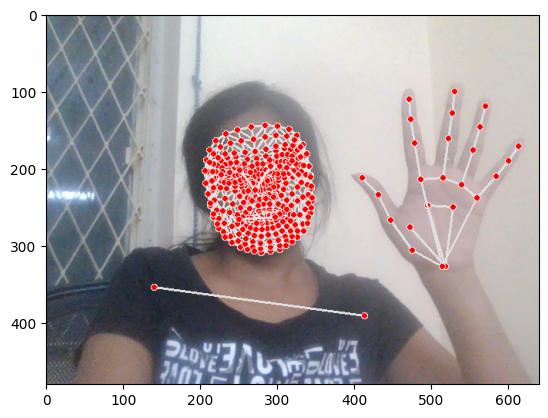

In [44]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [83]:
len(results.left_hand_landmarks.landmark)


21

In [84]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [80]:
test

array([ 2.94252515e-01,  3.06159902e+00, -4.82788756e-02,  4.12692869e-04])

In [85]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [91]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark] 
                if results.face_landmarks 
                else np.zeros((468, 3))).flatten()


In [92]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [93]:
result_test = extract_keypoints(results)


In [94]:
result_test

array([ 0.48866987,  0.41010192, -0.95014733, ...,  0.        ,
        0.        ,  0.        ])

In [95]:
468*3+33*4+21*3+21*3


1662

In [96]:
np.save('0', result_test)


In [97]:
np.load('0.npy')


array([ 0.48866987,  0.41010192, -0.95014733, ...,  0.        ,
        0.        ,  0.        ])

In [98]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [99]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [100]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [157]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
        

In [158]:
cap.release()
cv2.destroyAllWindows()

In [159]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [160]:
label_map = {label:num for num, label in enumerate(actions)}


In [161]:
label_map


{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [162]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [163]:
np.array(sequences).shape


(90, 30, 1662)

In [164]:
np.array(labels).shape


(90,)

In [165]:
X = np.array(sequences)


In [166]:
X.shape


(90, 30, 1662)

In [167]:
y = to_categorical(labels).astype(int)


In [168]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [170]:
y_test.shape


(5, 3)

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [172]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [173]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\SRI NIDHI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [174]:
res = [.7, 0.2, 0.1]


In [175]:
actions[np.argmax(res)]


'hello'

In [176]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [177]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - categorical_accuracy: 0.3426 - loss: 1.1326
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3756 - loss: 2.4657
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.2760 - loss: 1.8079
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3797 - loss: 4.5966
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.4187 - loss: 1.6997
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.3504 - loss: 3.0725
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.4501 - loss: 2.3047
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3405 - loss: 2.1429
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.4130 - loss: 1.2128
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.4384 - loss: 1.0421
Epoch 11/2000
3/3 ━━━━━━━━━━━

In [178]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [179]:
res = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


In [180]:
actions[np.argmax(res[4])]


'thanks'

In [181]:
actions[np.argmax(y_test[4])]


'thanks'

In [182]:
model.save('action.h5')


In [183]:
model.load_weights('action.h5')


In [184]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [185]:
yhat = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [186]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [187]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [188]:
accuracy_score(ytrue, yhat)


1.0

In [189]:
print(type(res))
print(res)


<class 'numpy.ndarray'>
[[8.9896701e-10 7.0220683e-09 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5521872e-09 9.9999905e-01 9.4926804e-07]
 [7.4041017e-13 9.9999988e-01 6.2485860e-08]
 [7.5123154e-08 9.9999964e-01 3.2570765e-07]]


In [190]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    for num, prob in enumerate(res):
        prob = float(prob)  # Ensure prob is a scalar
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame


In [191]:
print(type(image))  # Should be <class 'numpy.ndarray'>
print(image.shape)  # Should be (height, width, channels)


<class 'numpy.ndarray'>
(480, 640, 3)


In [192]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
plt.figure(figsize=(18,18))

# Ensure res is a list of scalars
res = np.array(res).flatten().tolist()  # Convert to list of scalars

plt.imshow(prob_viz(res, actions, image, colors))
plt.show()


IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

In [193]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    for num, prob in enumerate(res):
        prob = float(prob)  # Ensure prob is a scalar
        color = colors[num % len(colors)]  # Cycle through colors if more probabilities exist
        
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), color, -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame


In [194]:
print("res length:", len(res))
print("actions length:", len(actions))
print("colors length:", len(colors))


res length: 15
actions length: 3
colors length: 3


In [195]:
res = res[:len(actions)]  # Trim res to match actions


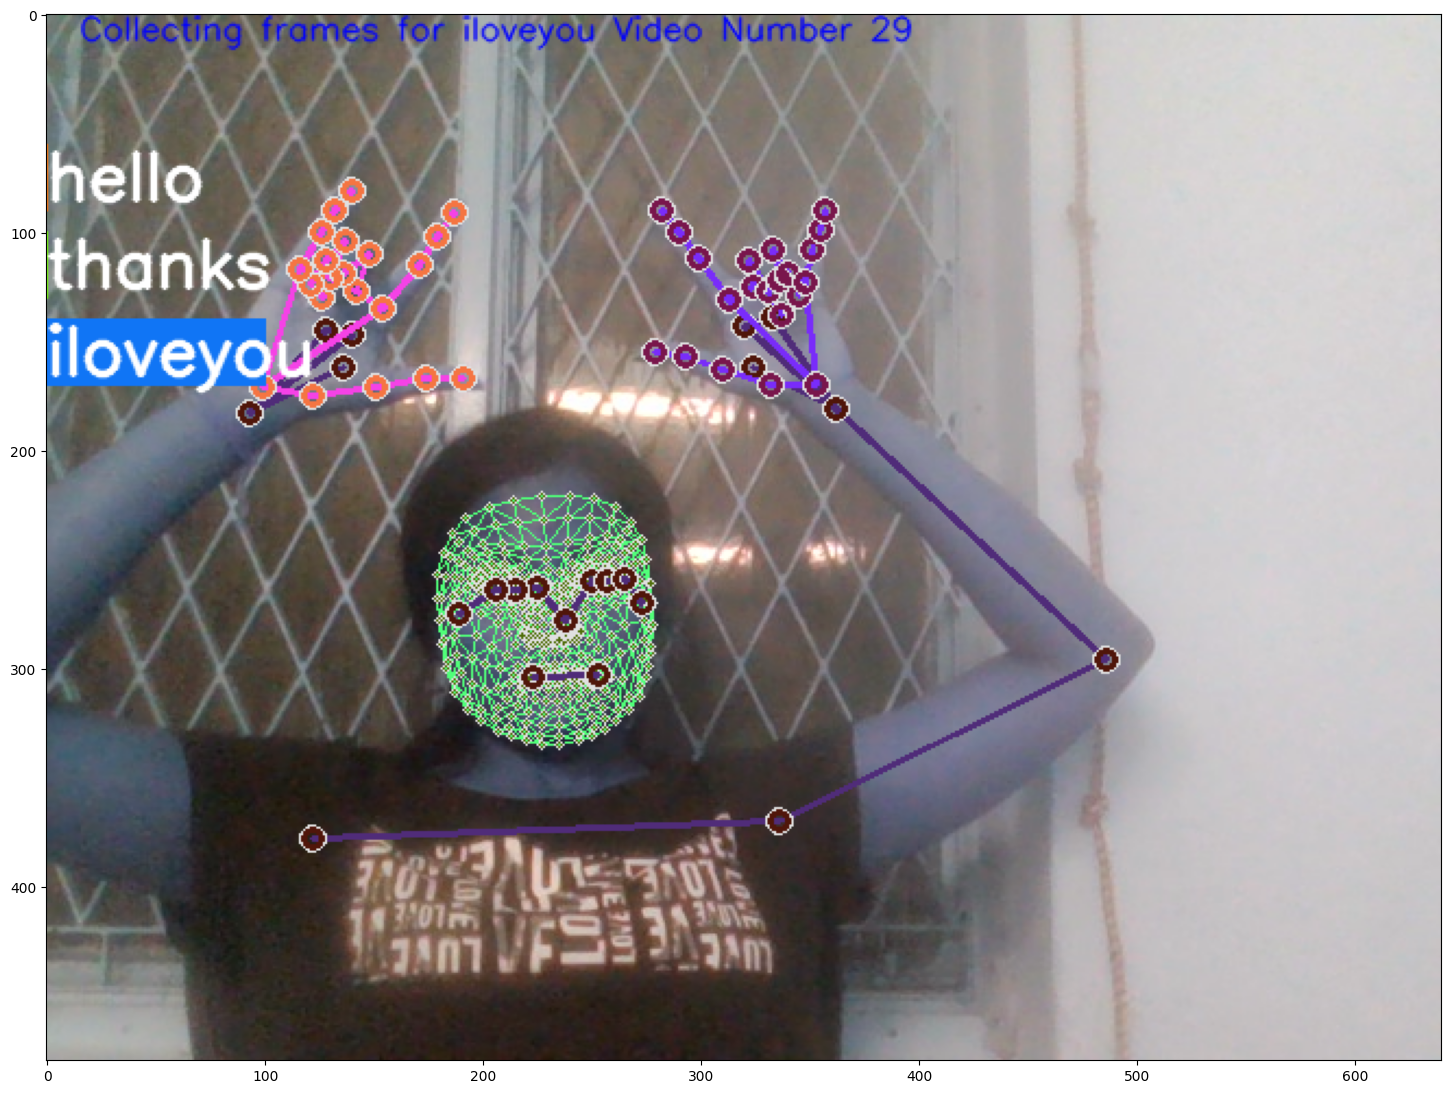

In [196]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
plt.figure(figsize=(18,18))

# Ensure res is a list of scalars
res = np.array(res).flatten().tolist() if res is not None else [0] * len(actions)

# Ensure res and actions have the same length
res = res[:len(actions)]  

plt.imshow(prob_viz(res, actions, image, colors))
plt.show()


In [197]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

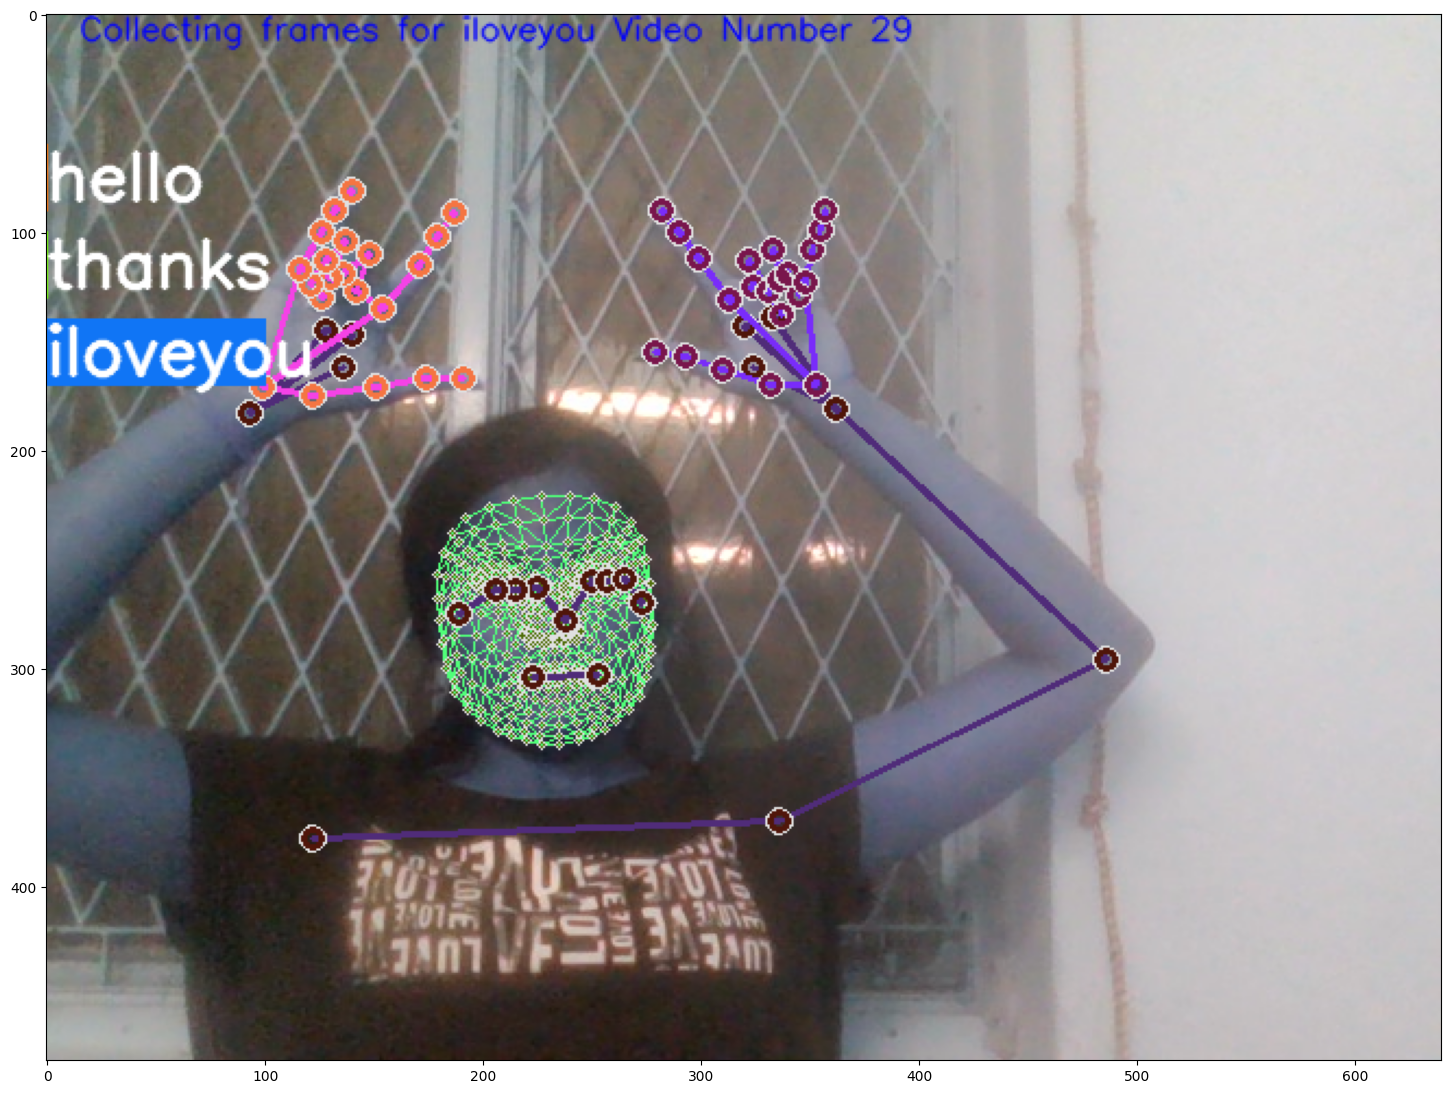

In [198]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [199]:
print("Type of sequence:", type(sequence))
print("Value of sequence:", sequence)


Type of sequence: <class 'int'>
Value of sequence: 29


In [200]:
if not isinstance(sequence, list):
    sequence = []  # Initialize as an empty list


In [201]:
sequence.reverse()


In [202]:
len(sequence)


0

In [203]:
sequence.append('def')


In [204]:
sequence.reverse()


In [205]:
sequence[-30:]


['def']

In [206]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [207]:
cap.release()
cv2.destroyAllWindows()

In [208]:
res[np.argmax(res)] > threshold


True

In [210]:
num_sequences = 10  # Set an appropriate value
print((num_sequences, 30, 1662))


(10, 30, 1662)


In [211]:
(num_sequences,30,1662)


(10, 30, 1662)

In [212]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[8.9861041e-10, 7.0200996e-09, 1.0000000e+00]], dtype=float32)